In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def round_to_next50(n):
    return n + (50 - n) % 50


In [3]:
spot = 17828
round_spot = round_to_next50(spot)
lower_graph_range = round_spot-800
upper_graph_range = round_spot+800
xval =range(lower_graph_range,upper_graph_range,50)
days_to_exp =13
iv =11.8
rangen = spot*(iv/100)*np.sqrt(days_to_exp/365)
sd1_lower_range = spot-rangen
sd1_upper_range = spot+rangen

sd2_lower_range = spot-2*rangen
sd2_upper_range = spot+2*rangen

In [4]:
lot_size = 50
def long_put(S, K, Price):
    # Long Put Payoff = max(Strike Price - Stock Price, 0)     # If we are long a call, we would only elect to call if the current stock price is less than     # the strike price on our option     
    P = list(map(lambda x: max(K - x,0) - Price, S))
    return P
   
def short_call(S, K, Price):
    # Payoff a shortcall is just the inverse of the payoff of a long call     
    P = long_call(S, K, Price)
    return [-1.0*p for p in P]

def short_put(S,K, Price):
    # Payoff a short put is just the inverse of the payoff of a long put 
    P = long_put(S,K, Price)
    return [-1.0*p for p in P]

def long_call(S, K, Price):
    # Long Call Payoff = max(Stock Price - Strike Price, 0)     # If we are long a call, we would only elect to call if the current stock price is greater than     # the strike price on our option     
    P = list(map(lambda x: max(x - K, 0) - Price, S))
    return P


In [24]:
def short_straddle(strike,call_price,put_price,xval,lot_size):
    
    yval1 = short_call(xval,strike,call_price)
    yval2 = short_put(xval,strike,put_price)
    total_payoff = np.array(yval1)+np.array(yval2)

    max_profit = np.max(total_payoff)
    breakevens = [strike-max_profit,strike+max_profit] 
    return max_profit,xval,total_payoff,breakevens

def long_straddle(strike,call_price,put_price,xval,lot_size):
    
    yval1 = long_call(xval,strike,call_price)
    yval2 = long_put(xval,strike,put_price)
    total_payoff = np.array(yval1)+np.array(yval2)

    max_profit = np.max(total_payoff)
    breakevens = [strike-max_profit,strike+max_profit] 
    return max_profit,xval,total_payoff,breakevens


def short_strangle(put_strike,call_strike,put_price,call_price,xval,lot_size):
    
    yval1 = short_call(xval,call_strike,call_price)
    yval2 = short_put(xval,put_strike,put_price)
    total_payoff = np.array(yval1)+np.array(yval2)

    max_profit = np.max(total_payoff)
    breakevens = [put_strike-max_profit,call_strike+max_profit] 
    return max_profit,xval,total_payoff,breakevens

def butterfly_call(round_spot,l1,l2,l3,lot_size):
    leg1 = np.array(short_call(xval,round_spot,l1))*3
    leg2 = np.array(long_call(xval,round_spot-100,l2))*1
    leg3 = np.array(long_call(xval,round_spot+100,l3))*2
    
    total_payoff = np.array(leg1)+np.array(leg2)+np.array(leg3)
    return np.max(total_payoff)*lot_size,xval,total_payoff*lot_size,[0,0]


def butterfly_put(round_spot,l1,l2,l3,lot_size):
    leg1 = np.array(short_put(xval,round_spot,l1))*3
    leg2 = np.array(long_put(xval,round_spot+100,l2))*1
    leg3 = np.array(long_put(xval,round_spot-100,l3))*2
    
    total_payoff = np.array(leg1)+np.array(leg2)+np.array(leg3)
    return np.max(total_payoff)*lot_size,xval,total_payoff*lot_size,[0,0]

### Straddle 

In [ ]:
max_profit,xval,total_payoff,breakevens = short_straddle(round_spot,100,100,xval)
print(max_profit,breakevens)
plt.plot(xval,total_payoff)
plt.hlines(y=0,xmin=min(xval),xmax=max(xval),linestyles='dashed',color="gray")
plt.vlines(x=sd1_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")
plt.vlines(x=sd1_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")

plt.vlines(x=sd2_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")
plt.vlines(x=sd2_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")

plt.vlines(x=spot,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="lightgray",linestyles="dashed")

In [ ]:
max_profit,xval,total_payoff,breakevens = long_straddle(round_spot,100,100,xval)
print(max_profit,breakevens)
plt.plot(xval,total_payoff)
plt.hlines(y=0,xmin=min(xval),xmax=max(xval),linestyles='dashed',color="gray")
plt.vlines(x=sd1_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")
plt.vlines(x=sd1_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")

plt.vlines(x=sd2_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")
plt.vlines(x=sd2_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")

plt.vlines(x=spot,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="lightgray",linestyles="dashed")

### Strangle

200.0 [17400.0, 18200.0] [-350. -300. -250. -200. -150. -100.  -50.    0.   50.  100.  150.  200.
  200.  200.  200.  200.  200.  200.  200.  200.  150.  100.   50.    0.
  -50. -100. -150. -200. -250. -300. -350. -400.]


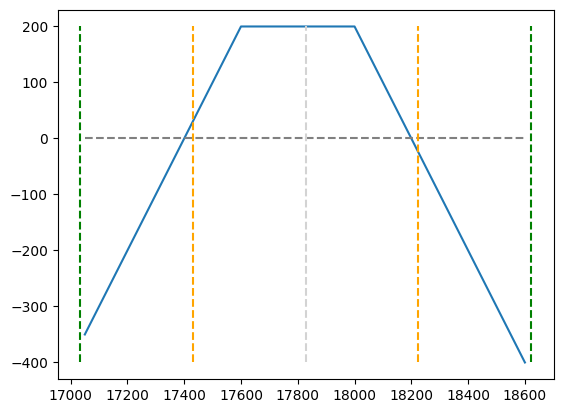

In [9]:

max_profit,xval,total_payoff,breakevens = short_strangle(17600,18000,100,100,xval)
print(max_profit,breakevens,total_payoff)
plt.plot(xval,total_payoff)
plt.hlines(y=0,xmin=min(xval),xmax=max(xval),linestyles='dashed',color="gray")
plt.vlines(x=sd1_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")
plt.vlines(x=sd1_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")

plt.vlines(x=sd2_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")
plt.vlines(x=sd2_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")

plt.vlines(x=spot,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="lightgray",linestyles="dashed")

## Broken Butterfly

6850.0 [0, 0] [ 1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.
  1850.  1850.  1850.  1850.  1850.  4350.  6850.  1850. -3150. -3150.
 -3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150.
 -3150. -3150.]


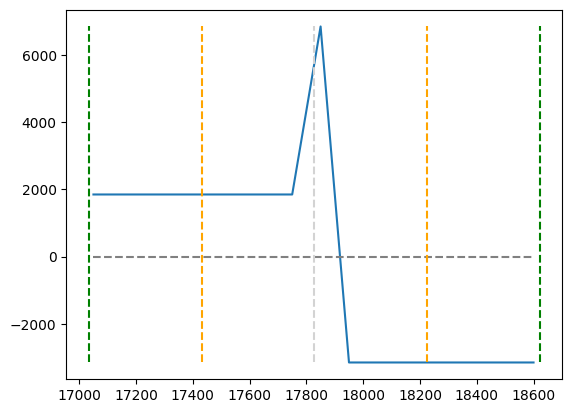

In [22]:
#short Straddle
max_profit,xval,total_payoff,breakevens = butterfly_call(round_spot,l1=149,l2=214,l3=98,lot_size=50)
print(max_profit,breakevens,total_payoff)
plt.plot(xval,total_payoff)
plt.hlines(y=0,xmin=min(xval),xmax=max(xval),linestyles='dashed',color="gray")
plt.vlines(x=sd1_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")
plt.vlines(x=sd1_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")

plt.vlines(x=sd2_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")
plt.vlines(x=sd2_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")

plt.vlines(x=spot,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="lightgray",linestyles="dashed")

6850.0 [0, 0] [-3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150. -3150.
 -3150. -3150. -3150. -3150. -3150.  1850.  6850.  4350.  1850.  1850.
  1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.  1850.
  1850.  1850.]


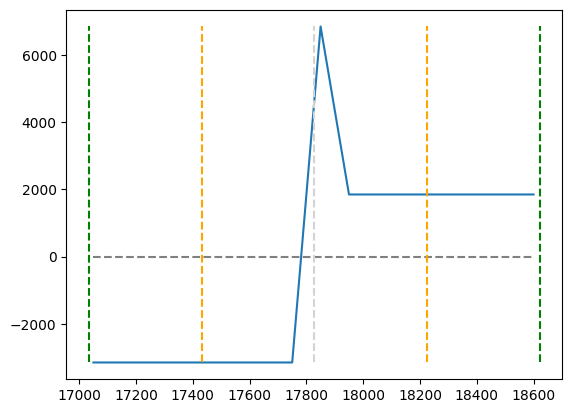

In [26]:

max_profit,xval,total_payoff,breakevens = butterfly_put(round_spot,l1=149,l2=214,l3=98,lot_size=50)
print(max_profit,breakevens,total_payoff)
plt.plot(xval,total_payoff)
plt.hlines(y=0,xmin=min(xval),xmax=max(xval),linestyles='dashed',color="gray")
plt.vlines(x=sd1_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")
plt.vlines(x=sd1_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="orange",linestyles="dashed")

plt.vlines(x=sd2_lower_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")
plt.vlines(x=sd2_upper_range,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="green",linestyles="dashed")

plt.vlines(x=spot,ymin=np.min(total_payoff),ymax = np.max(total_payoff),colors="lightgray",linestyles="dashed")